#### IMPORTS

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, fbeta_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from imblearn.over_sampling import SMOTE 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### READ DATA

In [86]:
test_df = pd.read_csv('./data/class_test.csv')
train_df = pd.read_csv('./data/class_train.csv')
imbalanced_df = pd.concat([test_df, train_df])

test = pd.read_csv('./data/nndb_flat.csv')


test.shape

(8618, 45)

#### ANALYSE DATA

#### PREPROCESSING

##### SCALING DATA

scaler = StandardScaler()
scaler.fit_transform(imbalanced_df)

###### 1. HANDLE CLASS IMBALANCE

In [63]:
imbalanced_df['Outcome'].value_counts()

1    64
0    52
Name: Outcome, dtype: int64

In [64]:
X = imbalanced_df.copy()   
y = X.pop('Outcome')

In [65]:
###### 1.1 SMOTE

In [66]:
smote = SMOTE(random_state=42)
balanced_df, y_balanced = smote.fit_resample(X, y)

In [67]:
balanced_df['Outcome'] = y_balanced

C:\Users\oskar\AppData\Local\Temp/ipykernel_19800/4073566135.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  balanced_df['Outcome'] = y_balanced


In [68]:
balanced_df['Outcome'].value_counts()

0    64
1    64
Name: Outcome, dtype: int64

In [80]:
balanced_df.shape

(128, 160)

###### 2. DIMENSION REDUCTION 

###### 2.1 PCA

In [96]:
nr_of_components = min(X.shape[0], X.shape[1]) - 1

print(nr_of_components)
pca = PCA(n_components=nr_of_components)
pca.fit_transform(X).shape

115


(116, 115)

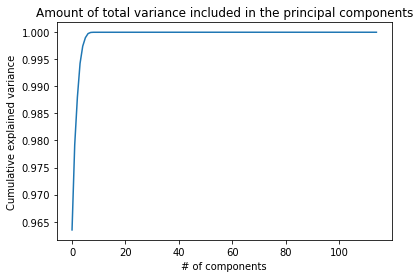

In [97]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')
plt.title("Amount of total variance included in the principal components")
plt.show()

###### 2.2 FEATURE SELECTION